In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
plt.rcParams['axes.grid'] = True

In [48]:
T = 10**4
m = 2
m_0 = 2

def grow_graph(T, m, m_0, preferential:bool = True): 
    X = np.zeros((T + m_0, T + m_0), dtype=bool)
    for i in range(1, m_0):
        for j in range(i):
            X[j, i] = 1

    K = np.sum(X, axis=0) + np.sum(X, axis=1)
    for t in tqdm(range(T)):
        if preferential:
            pool = []
            for i, n in enumerate(K):
                pool.extend([i]*n)
            if pool == []:
                new_idx = [0]
            new_idx = np.random.choice(np.array(pool), size=m)
        
        else:
            new_idx = np.random.choice(t+m_0, size=m, replace=False)

        for n in new_idx:
            X[n, t + m_0] = 1
            K[n] += 1
        
        K[t+m_0] = m

    return X, K

X, K = grow_graph(T, m, m_0, True)

100%|██████████| 10000/10000 [00:54<00:00, 182.64it/s]


[4942    0    0 2061    0    0  969    0  590    0  343  266  191  128
  109   63   42   63   30   46   26   28   13   16   12   15    6   10
    3    5    5    4    2    2    2    2    2    1    1    2    1    0
    0    0    0    0    0    0    0]


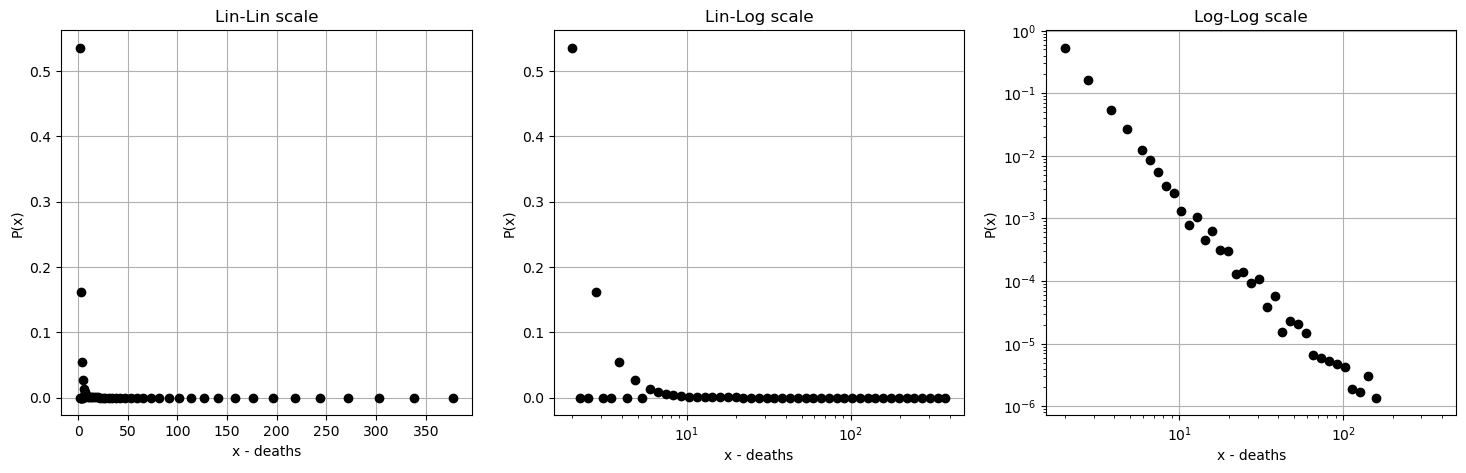

In [49]:
k_min, k_max = np.min(K), np.max(K)
bins = np.logspace(math.log(k_min), math.log(k_max), base=math.e)

hist, edges = np.histogram(K, bins=bins, density=False)
dX = np.diff(edges)
P = hist / dX / np.sum(K)

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
ax[0].set_title("Lin-Lin scale")
ax[1].set_xscale("log")
ax[1].set_title("Lin-Log scale")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_title("Log-Log scale")

for axx in ax.flatten():
    axx.set_ylabel("P(x)")
    axx.set_xlabel("x - deaths")
    axx.plot(edges[:-1], P, 'ok')

print(hist)